$Step-1$:
    
**Import required packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

$Step-2$

**Read the data**

In [2]:
# read the dataset 

df = pd.read_csv("C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Datafiles\\Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


**Objective**

- Based on years of experience , estimate the salary of an employee

In [3]:
df.shape

(30, 2)

In [4]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [7]:
df['YearsExperience'].unique()

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.7,  3.9,  4. ,
        4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,  7.9,  8.2,
        8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [8]:
#check any correlation and covariance

df[['YearsExperience','Salary']].cov()

,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


In [9]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


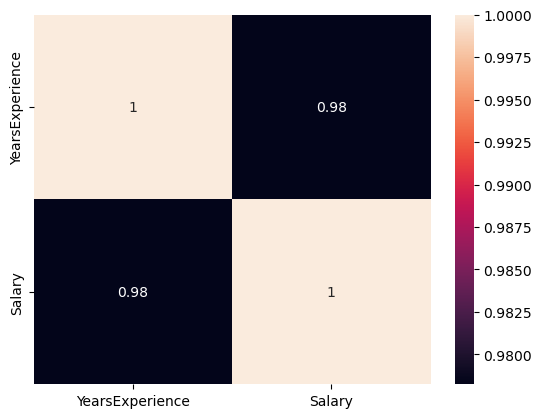

In [10]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [11]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

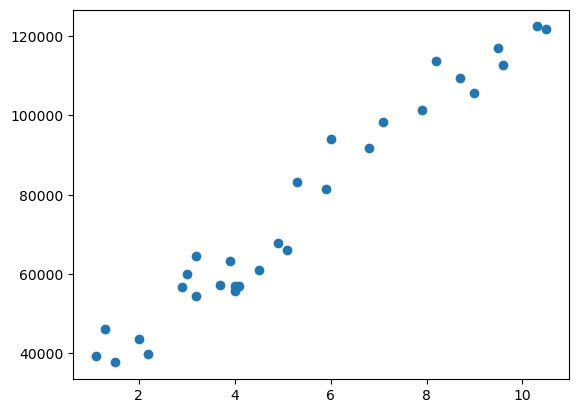

In [12]:
plt.scatter(df['YearsExperience'],df['Salary'])

- We divide data into two parts i.e input data and output data

- input data = X; output data=y

- Again we divide input data into two parts i.e train and test

- input train data= x_train; input test data= x_test

- similarly we divide output data into two parts i.e train and test

- output train data= y_train; output test data= y_test

- Model development happens on train data i.e x_train and y_train

- Model will predict by passing x_test data, these are called y_predictions

- y_predictions will compare with y_test , this is called test accuracy/ test error

In [ ]:
#x_train   y_train
#1           1
#2           4
#3           9
#4           16

#x_test    y_test
#5         25

#develope a model (1,1) (2,4) (3,9) (4,16)
#model will predict by passing 5 , y_predictions  we need to compare with y_test 

$Step-3$

**divide data into input and output data**

In [13]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [14]:
X=df['YearsExperience']
y=df['Salary']

$Step-4$

**Divide data into train and test**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,  # Input data
                                                  y,  # output data
                                                  random_state=1234, # it select random samples
                                                  test_size=0.30)

# test size= 0.30 means 30% samples are test sample and 70% samples are train samples
# test samples=9
# train samples =21

In [16]:
X_train.shape, X_test.shape

((21,), (9,))

In [17]:
y_train.shape, y_test.shape

((21,), (9,))

In [18]:
X_train

13     4.1
22     7.9
24     8.7
0      1.1
2      1.5
27     9.6
26     9.5
18     5.9
5      2.9
16     5.1
25     9.0
11     4.0
9      3.7
17     5.3
29    10.5
20     6.8
12     4.0
21     7.1
6      3.0
19     6.0
15     4.9
Name: YearsExperience, dtype: float64

In [19]:
df.shape
30*0.30

9.0

$Step-5$

**Model development**

In [20]:
# Model development happens using train data
# X_train    y_train
#from sklearn.linear_model import LinearRegression
#LR=LinearRegression()


In [21]:
X_train.shape

(21,2)

(21, 2)

In [22]:
df.shape   # 30 rows   2 columns

(30, 2)

In [23]:
df.ndim # number of dimensions

2

In [24]:
X_train.ndim
# 1 dimension means 1 column only
# 2 dimension means 2 column only
# when you have only 1 coulmn, the shape will not show the coulumn
# (21,) it is only one column data having 21 observations
# (9,) it is one column data having 9 observation
# (30,2) it is 2 column data having 30 observation
# Reshape the data if you have only one column

1

In [25]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train.array.reshape(-1, 1),
       y_train)

LinearRegression()

$Step-6$

**Model predictions**

In [26]:
# Model predictions happens X_test
y_predictions=LR.predict(X_test.array.reshape(-1, 1))

In [27]:
y_predictions

array([ 55630.13259001,  62221.33017291,  46214.136043  ,  37739.7391507 ,
       122483.70807372,  55630.13259001,  44330.9367336 , 102710.11532501,
        67870.92810111])

In [28]:
y_test.values

array([ 54445.,  63218.,  39891.,  46205., 122391.,  64445.,  43525.,
       113812.,  61111.])

$Step-7$

**Model evaluation**

In [29]:
# RMSE
# MSE
# MAE
# R-square

from sklearn.metrics import r2_score,mean_squared_error

In [30]:
R2=r2_score(y_test,y_predictions)
MSE=mean_squared_error(y_test,y_predictions)
RMSE=np.sqrt(MSE)
#accuracy_score(y_test,y_predictions) # it is a regression tech
print("R-sqaure:",R2)
print("MSE:",MSE)
print("RMSE:",RMSE)

R-sqaure: 0.949721948148016
MSE: 40149896.466138825
RMSE: 6336.39459520466


In [31]:
# Suppose your original salary is 50k
# Our model will expecting either 44k  or  56k 

$Step-8$

**Finding coeffiecnt and Intercept**

- Coefficient means b0 ,b1 ,b2....

- Coeffiecints depends on number of input features

- In this data we have only one column as input i.e. Years of Experience

- So we will get only one coeffiecnt

In [32]:
LR.coef_
print("The coeffiecnt of Years_of_experience is:",LR.coef_)

The coeffiecnt of Years_of_experience is: [9415.996547]


In [33]:
LR.intercept_

25498.943639602097

In [34]:
df.columns[0]

'YearsExperience'

In [35]:
#Regression_equation=LR.intercept_+LR.coef_*'YearsExperience'
#Regression_equation

$Step-9$

**Plot the regression line**

- In order to plot regression line

- We need to undertsand the two plots

- Orginal data plot i.e input data(X) vs output data(y)

- Regression plot i.e input data (X) vs predictions of regression model by passing input data (X)

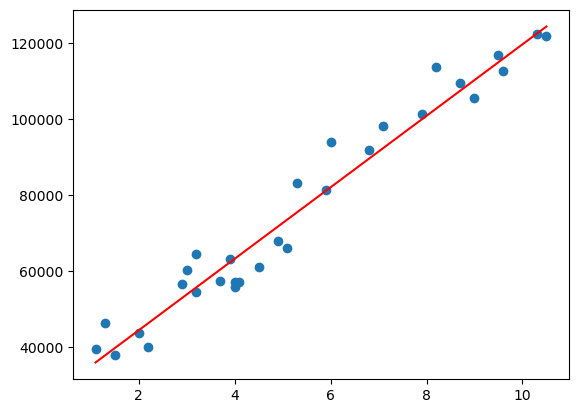

In [36]:
# Draw the regression line on original data vs predictions on original data

original_y_predictions=LR.predict(X.array.reshape(-1,1))
plt.scatter(X,y,label='original data')  # Original plot
plt.plot(X,original_y_predictions,color='red') # Regression plot

$Step-10$

**Stas.OLS method**

In [38]:
from statsmodels.api import OLS
OLS(y_train,X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              961.4
Date:                Fri, 06 Oct 2023   Prob (F-statistic):                    2.20e-18
Time:                        10:57:57   Log-Likelihood:                         -226.92
No. Observations:                  21   AIC:                                      455.8
Df Residuals:                      20   BIC:                                      456.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.307e+04    421.648     31.007      0.000    1.22e+04     1.4e+04
==============================================================================
Omnibus:                        0.412   Durbin-Watson:                   1.562
Prob(Omnibus):                  0.814   Jarque-Bera (JB):                0.527
Skew:                           0.010   Prob(JB):                        0.768
Kurtosis:                       2.224   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## All together

################################## Data into two parts############################################
X=df['YearsExperience']  
y=df['Salary']


################################ Train test split #################################################
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,  # Input data
                                                  y,  # output data
                                                  random_state=1234, # it select random samples
                                                  test_size=0.30)

#########################Model predictions happens X_test############################################
y_predictions=LR.predict(X_test.array.reshape(-1, 1))


######################### Metrics######################################################################

from sklearn.metrics import r2_score,mean_squared_error
R2=r2_score(y_test,y_predictions)
MSE=mean_squared_error(y_test,y_predictions)
RMSE=np.sqrt(MSE)
#accuracy_score(y_test,y_predictions) # it is a regression tech
print("R-sqaure:",R2)
print("MSE:",MSE)
print("RMSE:",RMSE)

$Step-11$:
    
**Save the model**

In [38]:
import pickle
pickle.dump(LR,
            open('linear_salary_model.pkl','wb'))

#Model name=LR
#In which name the model is saving: linear_slaary_model
# extenstion: Pickle
# wb: write in bytes

$Step-12$:

**Load the model**

In [39]:
# Loading model to compare the results
model = pickle.load(open('linear_salary_model.pkl','rb'))
model

LinearRegression()

$Step-13$:
    
**Predictions**

In [42]:
X.array.reshape(-1,1)

<PandasArray>
[
[1.1],
[1.3],
[1.5],
[2.0],
[2.2],
[2.9],
[3.0],
[3.2],
[3.2],
[3.7],
[3.9],
[4.0],
[4.0],
[4.1],
[4.5],
[4.9],
[5.1],
[5.3],
[5.9],
[6.0],
[6.8],
[7.1],
[7.9],
[8.2],
[8.7],
[9.0],
[9.5],
[9.6],
[10.3],
[10.5]
]
Shape: (30, 1), dtype: float64

In [45]:
model.predict([[3],
               [3.5],
               [4]])

array([53746.93328061, 58454.93155411, 63162.92982761])

In [47]:
test_sample=[[1.5],[2.5],[3.5]]
model.predict(test_sample)

array([39622.9384601 , 49038.93500711, 58454.93155411])

In [37]:
import os
os.getcwd()

'C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Data science\\Batch-2_July3\\ML python\\Linear_regression'

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
